Semesterarbeit Teil 4a (Beat Kappert)
=====================================

Dieses Programm approximiert die Funktion `ln(x + 1) * sin(x)` als Taylorpolynom mit Hilfe von SymPy und stellt die originale Funktion und die Approximation dar.

Der gewünschte Grad des Taylorpolynoms (Anzahl Ableitungen, die mit der Originalfunktion übereinstimmen müssen) wird vom Programm als Eingabe erwartet.  
Ein interessanter Wert für den Grad ist 22.  
Eine leere Eingabe beendet das Programm.

Das Programm ist als Endlosschlaufe angelegt, d.h. man kann verschiedene Grade nacheinander ausprobieren ohne Neustart.

In [1]:
%matplotlib inline

Taylor polynomial for:  log(x + 1)*sin(x)



Desired degree for Taylor polynomial (at least 2, <CR> to end):  22


Taylor polynomial (without Big-O):  (x - 10)**21*(log(11)*cos(10)/51090942171709440000 + 113472513882648253*cos(10)/7439703698510225591229539889242112000 + 742586088753656212427*sin(10)/34371431087117242231480474288298557440000) + (x - 10)**20*(log(11)*sin(10)/2432902008176640000 + 425780217329227*sin(10)/1398440544832749171283748099481600 - 1507265415792673129*cos(10)/3381683499322829814195245404200960000) + (x - 10)**19*(-5911289627826566843*sin(10)/676336699864565962839049080840192000 - 31896842534219*cos(10)/5531727803251674337210559692800 - log(11)*cos(10)/121645100408832000) + (x - 10)**18*(468703484813449*cos(10)/2884189630037637689187323904000 - 2183852665095931*sin(10)/21150723953609343054040375296000 - log(11)*sin(10)/6402373705728000) + (x - 10)**17*(log(11)*cos(10)/355687428096000 + 46674202839406979*sin(10)/16343741236879946905394835456000 + 4756315181759*cos(10)/2731240179959884175366784000) + (x - 10)**16*(log(11)*sin(10)/20922789888000 + 2006995453091*sin(10)/7283307146

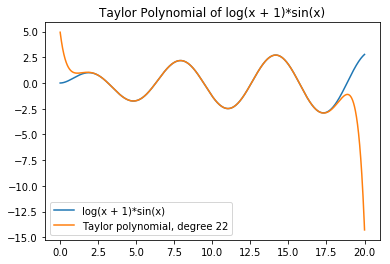

Desired degree for Taylor polynomial (at least 2, <CR> to end):  4


Taylor polynomial (without Big-O):  (x - 10)**3*(-cos(10)/242 - 361*sin(10)/7986 - log(11)*cos(10)/6) + (x - 10)**2*(cos(10)/11 - sin(10)/242 - log(11)*sin(10)/2) + (x - 10)*(log(11)*cos(10) + sin(10)/11) + log(11)*sin(10)


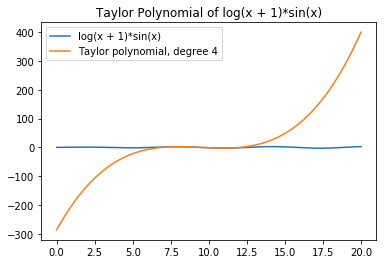

Desired degree for Taylor polynomial (at least 2, <CR> to end):  15


Taylor polynomial (without Big-O):  (x - 10)**14*(460533823*cos(10)/43305290113347046400 - 7398015197*sin(10)/1322914748262590343168 - log(11)*sin(10)/87178291200) + (x - 10)**13*(log(11)*cos(10)/6227020800 + 2798544813019*sin(10)/19543058781151902796800 + 38444603*cos(10)/542320423497388800) + (x - 10)**12*(log(11)*sin(10)/479001600 + 4689342829*sin(10)/5694364446722582400 - 12164295401*cos(10)/6833237336067098880) + (x - 10)**11*(-163583869*cos(10)/18824345278421760 - 231002307449*sin(10)/11388728893445164800 - log(11)*cos(10)/39916800) + (x - 10)**10*(898455869*cos(10)/4278260290550400 - 172352357*sin(10)/2091593919824640 - log(11)*sin(10)/3628800) + (x - 10)**9*(log(11)*cos(10)/362880 + 111519071*sin(10)/57043470540672 + 18709*cos(10)/27009219006) + (x - 10)**8*(log(11)*sin(10)/40320 + 783143*sin(10)/154338394320 - 317239*cos(10)/19643068368) + (x - 10)**7*(-13471*cos(10)/425174640 - 3812107*sin(10)/32738447280 - log(11)*cos(10)/5040) + (x - 10)**6*(8315*cos(10)/11595672 - 4641*sin

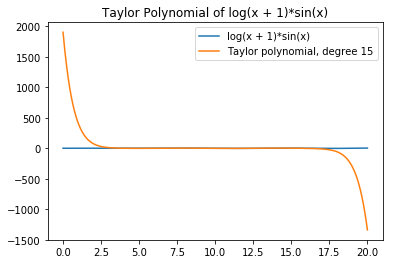

In [ ]:
from numpy import r_
import matplotlib.pyplot as plt
from sympy import *

"""
Taylor polynomial of variable degree.
"""
x = symbols('x')
x_axis = r_[0:20:2000j]

original_function = log(x + 1) * sin(x)  # change function here
print('Taylor polynomial for: ', original_function)
original_function_lambda = lambdify(x, original_function, "numpy")
y_values_original_function = original_function_lambda(x_axis)
original_function_lambda = lambdify(x, original_function, "numpy")

while True:
    print('')

    degree_string = input(
        'Desired degree for Taylor polynomial (at least 2, <CR> to end): ').strip()
    if not degree_string:
        break
    try:
        degree = int(degree_string)
    except (ValueError) as bad_degree_string:
        print(bad_degree_string)
        continue
    if degree < 2:
        print('Degree must be 2 or higher...')
        continue

    plt.title("Taylor Polynomial of " + str(original_function))
    plt.plot(x_axis, y_values_original_function, label=original_function)

    taylor_series = original_function.series(x, 10, degree).removeO()
    print('Taylor polynomial (without Big-O): ', taylor_series)
    taylor_series_lambda = lambdify(x, taylor_series, "numpy")
    y_values_taylor_series = taylor_series_lambda(x_axis)
    plt.plot(x_axis, y_values_taylor_series,
             label="Taylor polynomial, degree " + str(degree))

    plt.legend()
    plt.show()

print('Program ending...')